<a href="https://colab.research.google.com/github/veljkoselakovic/Python-Machine-Learning-Raschka/blob/main/ADALINE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ADALINE class**


In [15]:
import numpy as np
class ADALINE(object):
  '''
  ADAptive LInear NEuron
  ---------Parameters--------
  eta: float - learning rate 0<eta<1
  iter_number: int - iteration over dataset
  random_state: int - RNG seed
  ---------Attributes--------
  w_: ld-array - weights after fitting
  cost_ : list - sum of squares function value in each epoch
  '''
  def __init__(self, eta=0.01, iter_number=50, random_state=1):
    self.eta = eta
    self.iter_number = iter_number
    self.random_state = random_state
  def fit(self, x, y):
    ''' 
    Fit the data
    Meat of the ADALINE
    -------Parameters-------
    x: array-like, shape = {n_examples, n_features}
    Training vectors
    n_examples - the number of examples
    n_features - the number of distinct features
    y: array-like, shape = {n_examples}
    Target value vector
    ---------Return-----------
    self: object
    '''
    rstate = np.random.RandomState(self.random_state)
    self.w_ = rstate.normal(loc = 0.0, scale = 0.01, size = 1 + x.shape[1]) # Initalize weights to a number close to 0
    self.cost_ = []
    for i in range(self.iter_number):
      net_input = self.net_input(x)
      out = self.activation(net_input)
      errs = y - out
      self.w_[1:] += self.eta * x.T.dot(errs)
      self.w_[0] += self.eta * errs.sum()
      cost = (errs**2).sum() / 2.0
      self.cost_.append(cost)
    return self
  def net_input(self, x):
    '''
    Calculates the net input function FI(w^Tx)
    '''
    return np.dot(x, self.w_[1:]) + self.w_[0]
  def activation(self, x):
    '''
    Calculates linear activation
    '''
    return x # ilustration for multilayer stuff
  def predict(self, x):
    '''
    Predicts class label in unit steps
    '''
    return np.where(self.activation(self.net_input(x)) >= 0.0, 1, -1)

**Importing the iris dataset**

In [6]:
import os
import pandas as pd
a = os.path.join('https://archive.ics.uci.edu', 'ml', 'machine-learning-databases', 'iris', 'iris.data')
df = pd.read_csv(a, header=None, encoding='utf-8')
print(df.tail())

       0    1    2    3               4
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica


**Preparing the data + Visualisation**

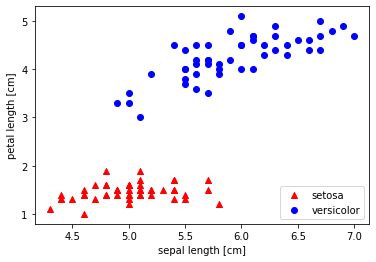

In [10]:
import matplotlib.pyplot as plt

y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
x = df.iloc[0:100, [0,2]].values

plt.scatter(x[:50, 0], x[:50,1], color = 'red', marker='^', label='setosa')
plt.scatter(x[50:100, 0], x[50:100, 1], color='blue', marker = 'o', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='lower right')
plt.show()

**Learning rate comparison**

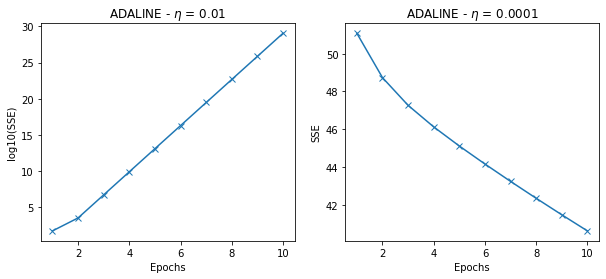

In [19]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(10,4))
ada = ADALINE(eta=0.01, iter_number=10).fit(x,y)
ax[0].plot(range(1, len(ada.cost_) + 1), np.log10(ada.cost_), marker = 'x')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log10(SSE)')
ax[0].set_title('ADALINE - $\eta$ = 0.01')

ada2 = ADALINE(eta=0.0001, iter_number=10).fit(x,y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='x')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('SSE')
ax[1].set_title('ADALINE - $\eta$ = 0.0001')
plt.show()

**Plot the decision surfaces using prediction for every possible choice**

In [21]:

def plot_decision_regions(x,y, classifier, resolution = 0.02):
  from matplotlib.colors import ListedColormap

  # Marker generator + color map
  markers = ('s', 'x', 'o', '^', 'y')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])
  
  # Plot decision surfaces
  x1_min, x1_max = x[:, 0].min() - 1, x[:, 0].max() + 1
  x2_min, x2_max = x[:, 1].min() - 1, x[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
  z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  z = z.reshape(xx1.shape)
  plt.contourf(xx1, xx2, z, alpha = 0.3, cmap = cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())
  # Plot examples
  for idx, cl in enumerate(np.unique(y)):
    c = "Iris Versicolor" if cl == 1 else "Iris Setosa"
    plt.scatter(x = x[y==cl, 0], y = x[y == cl, 1],
                alpha = 0.8,
                c = colors[idx],
                marker = markers[idx],
                label = c,
                edgecolor='black')
  #plt.show()


**Scaling the attributes**

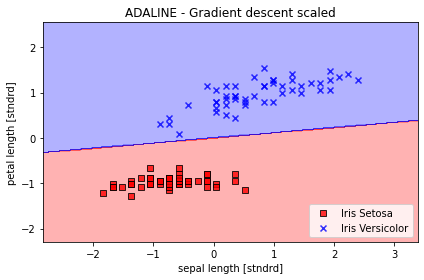

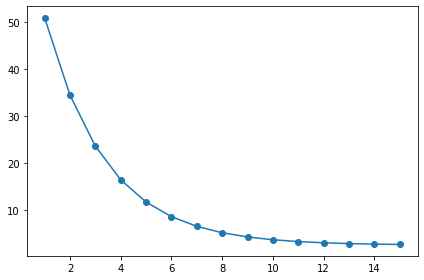

In [23]:
x_std = np.copy(x)
x_std[:,0] = (x[:,0] - x[:,0].mean()) / (x[:,0].std())
x_std[:,1] = (x[:,1] - x[:,1].mean()) / (x[:,1].std())
ada_scaled = ADALINE(iter_number=15, eta = 0.01)
ada_scaled.fit(x_std, y)

plot_decision_regions(x_std, y, ada_scaled)
plt.title('ADALINE - Gradient descent scaled')
plt.xlabel('sepal length [stndrd]')
plt.ylabel('petal length [stndrd]')
plt.legend(loc = 'lower right')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada_scaled.cost_) + 1), ada_scaled.cost_, marker='o')
plt.xlabel=('Epochs')
plt.ylabel=('SSE')
plt.tight_layout()
plt.show()
